<a href="https://colab.research.google.com/github/naiaraAM/ML_project_UT/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Set up enviroment


# Download data


In [46]:
import pandas as pd

In [5]:
!unzip -q playground-series-s4e6.zip -d data
!rm playground-series-s4e6.zip

unzip:  cannot find or open playground-series-s4e6.zip, playground-series-s4e6.zip.zip or playground-series-s4e6.zip.ZIP.
rm: cannot remove 'playground-series-s4e6.zip': No such file or directory


In [47]:
from sklearn.model_selection import train_test_split
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

print(f"The train data has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test data has {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The train data has 76518 rows and 38 columns
The test data has 51012 rows and 37 columns


<font color='red'>Do your code in the cell bellow your name, so we don't have merge issues. We can merge on friday's meeting</font>


## Naiara


In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # normalize data

model = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    alpha=0.001, # regularization
    random_state=1,
    max_iter=500,
    learning_rate_init=0.001,
    validation_fraction=0.2, # the model uses 20% of data for validation
    early_stopping=True, # stops when overfitting is detected
    batch_size=32                    # Set batch size for more efficient training
)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 100)],
    'alpha': [0.0001, 0.001, 0.01],  # Different regularization values
    'learning_rate_init': [0.001, 0.01, 0.0001],  # Explore different learning rates
    'batch_size': [32, 64],          # Experiment with different batch sizes
}

In [69]:
#history = model.fit(X_train_scaled, y_train)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/gpfs/helios/home/naiara/machine_learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=0.001, batch_size=32,
                                     early_stopping=True,
                                     hidden_layer_sizes=(50,), max_iter=500,
                                     random_state=1, validation_fraction=0.2),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01], 'batch_size': [32, 64],
                         'hidden_layer_sizes': [(50,), (100,), (50, 100)],
                         'learning_rate_init': [0.001, 0.01, 0.0001]},
             verbose=True)

In [70]:
model = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'alpha': 0.01, 'batch_size': 32, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001}


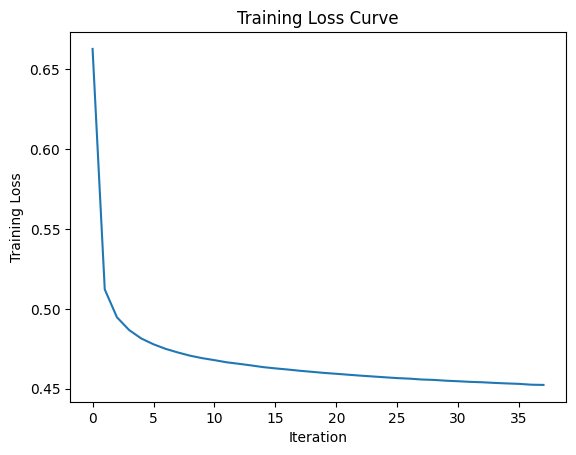

In [71]:
import matplotlib.pyplot as plt

# Plot the training loss curve
plt.plot(model.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")
plt.show()

In [72]:
def submitModel(model, X_test):
    X_test_scaled = scaler.transform(X_test)
    Y_tilda = model.predict(X_test_scaled)
    submission = pd.DataFrame(
        {'id': X_test["id"], 'Target': Y_tilda},
        columns = ['id', 'Target'])
    submission.to_csv('submission.csv', index = False)

In [73]:
submitModel(model, test_data) # 0.82420
#kaggle competitions submit -c playground-series-s4e6 -f submission.csv -m "Message"

## Juan


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
train_data.describe(include='all')

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36282
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921,NaN
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382,NaN
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000,NaN
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000,NaN


In [8]:
train_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [9]:
train_data.dtypes

id                                                  int64
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees u

In [10]:
train_data.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
76513    False
76514    False
76515    False
76516    False
76517    False
Length: 76518, dtype: bool

In [11]:
X, Y = train_data.drop(columns=['Target']), train_data['Target']
X.shape, Y.shape, train_data.shape

((76518, 37), (76518,), (76518, 38))

In [12]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X) # normalize data

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state = 111, test_size = 0.20)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((61214, 37), (61214,), (15304, 37), (15304,))

### Bagger


In [14]:
bagger = BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=1.0, n_estimators=9, random_state=1111)
score = cross_val_score(bagger, X_Scaled, Y, cv=4)
print(f'Average validation accuracy is {np.mean(score)*100}%')

Average validation accuracy is 70.09047692726553%


### Random forest


In [15]:
randomF = RandomForestClassifier()
score = cross_val_score(randomF, X, Y, cv=4)
print(f'Average validation accuracy is {np.mean(score)*100}%')

Average validation accuracy is 81.44485433957801%


In [16]:
randomF = RandomForestClassifier()
score = cross_val_score(randomF, X_Scaled, Y, cv=4)
print(f'Average validation accuracy is {np.mean(score)*100}%')

Average validation accuracy is 81.68009966557975%


In [17]:
randomF100 = RandomForestClassifier(n_estimators=100, max_features="sqrt")
randomF100.fit(X_train,Y_train)
randomF100.score(X_val, Y_val)

0.8274960794563513

In [18]:
randomF1000 = RandomForestClassifier(n_estimators=1000, max_features="sqrt")
randomF1000.fit(X_train,Y_train)
randomF1000.score(X_val, Y_val)

0.8282148457919498

In [19]:
def submitModel(model, X_test):
    Y_tilda = model.predict(X_test)
    submission = pd.DataFrame(
        {'id': X_test["id"], 'Target': Y_tilda},
        columns = ['id', 'Target'])
    submission.to_csv('submission.csv', index = False)

In [21]:
submitModel(randomF1000, test_data) #0.82982
submitModel(randomF100, test_data) #0.82523
#!kaggle competitions submit -c playground-series-s4e6 -f submission.csv -m "Random forest"

## Fidan


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

X_train = train_data.iloc[:, :-1].values  
y_train = train_data.iloc[:, -1].values    

# normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)), 
    layers.Dense(50, activation='relu'),
    layers.Dense(100, activation='relu'), 
    layers.Dense(1, activation='sigmoid')  
])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
y_train = [1 if label == 'Graduate' else 0 for label in y_train]
X_train_scaled = np.array(X_train_scaled, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9962 - loss: 0.0231 - val_accuracy: 1.0000 - val_loss: 9.2588e-06
Epoch 2/50
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 1.0000 - loss: 2.3424e-06 - val_accuracy: 1.0000 - val_loss: 1.6419e-06
Epoch 3/50
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 1.0000 - loss: 4.6668e-07 - val_accuracy: 1.0000 - val_loss: 4.5766e-07
Epoch 4/50
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 347us/step - accuracy: 1.0000 - loss: 1.3649e-07 - val_accuracy: 1.0000 - val_loss: 1.4816e-07
Epoch 5/50
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 328us/step - accuracy: 1.0000 - loss: 4.3595e-08 - val_accuracy: 1.0000 - val_loss: 5.1317e-08
Epoch 6/50
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 339us/step - accuracy: 1.0000 - loss: 1.5143e-08 - val_accuracy: 1.0000 - val_loss: 1.9079e-08
Epoch 7/50
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 1.0000 - loss: 5.8768e-09 - val_accuracy: 1.0000 - val_loss: 7.5823e-09
Epoch 8/50
1913/1913 ━━━━━━━━━━━━━━

In [33]:
# evaluate the model